<h1 style="background-color:yellow;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
* [2. Exploratory Data Analysis(EDA)](#2)
    * [2.1 Univariate analysis of continuous variables](#2.1)
    * [2.2 Relationship between two continuous variables](#2.2)
    * [2.3 Relationship between continuous variables and one categorical variable](#2.3)
    * [2.4 Explore categorical variables](#2.4)
* [3. 3D plots](#3)

<a id="1.2"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<a id="1.3"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>

In [2]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
tabular=pd.read_csv('../input/tabular-playground-series-mar-2021/train.csv')
titanic=pd.read_csv('../input/titanic/train.csv')
rain=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
hr=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
iris=pd.read_csv('../input/iris/Iris.csv')
df.drop('id',axis=1,inplace=True)

In [3]:
cont_features= ['age','avg_glucose_level','bmi']
cat_features= ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
target='stroke'

<a id="2"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

<a id="2.1"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate analysis of continuous variables</h3>

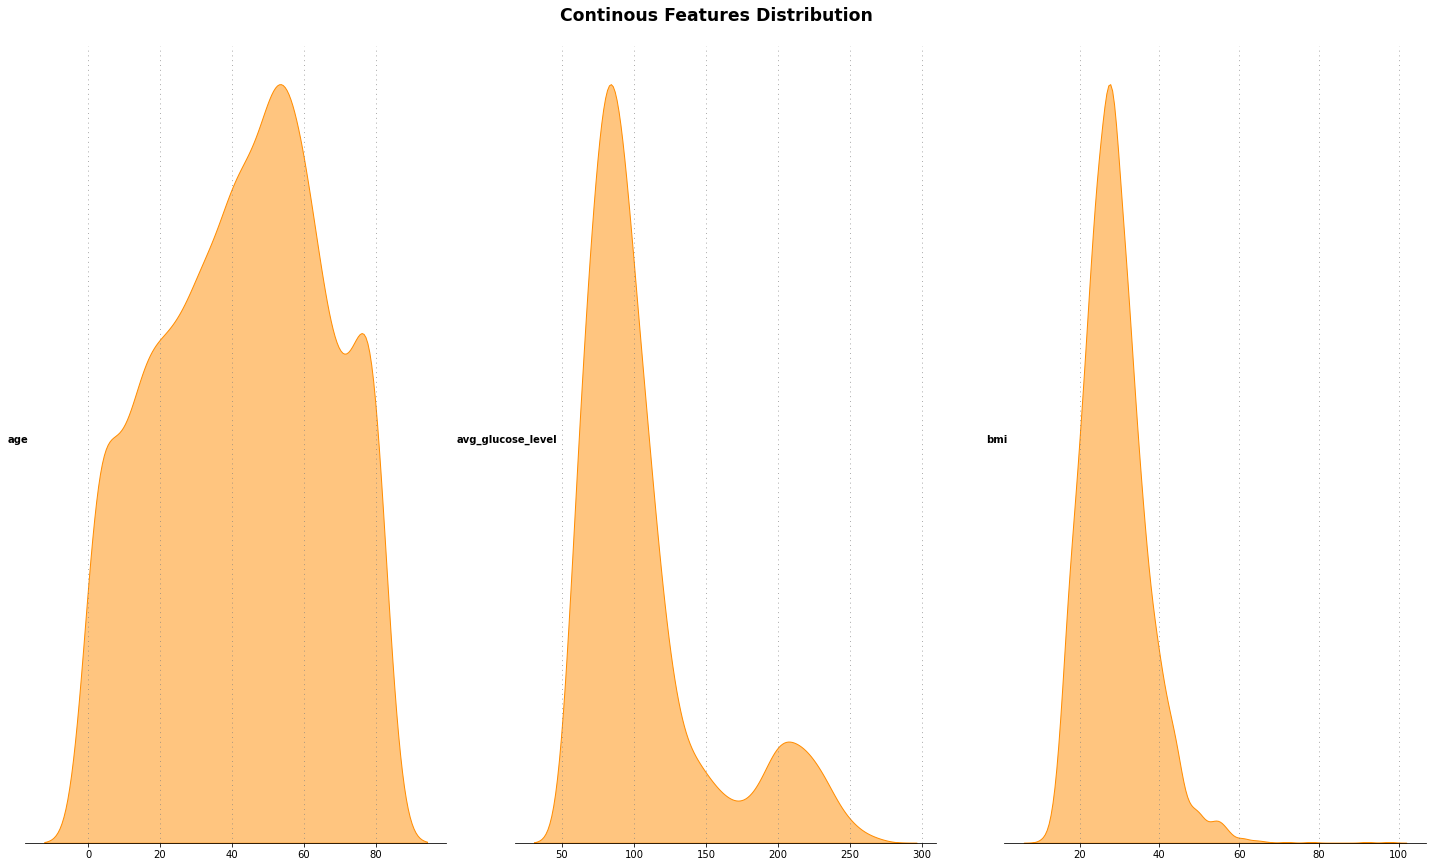

In [4]:
fig=plt.figure(figsize=(20,12),facecolor='white')

fig.suptitle('Continous Features Distribution',x=0.5,y=1, fontsize="xx-large",fontweight="bold")

for plot in range(1,4):
    
    locals()["ax"+str(plot)]=fig.add_subplot(1,3,plot)
    locals()["ax"+str(plot)].set_facecolor('white')
    locals()["ax"+str(plot)].set_yticklabels([])
    locals()["ax"+str(plot)].tick_params(axis='y',which='both',length=0)
    
    for direction in ["top","right", 'left']:
        locals()["ax"+str(plot)].spines[direction].set_visible(False)
    
i=1   
for cont in cont_features:
    
    sns.kdeplot(df[cont],ax=locals()["ax"+str(i)],shade=True, color='darkorange', alpha=0.5)
    locals()["ax"+str(i)].grid(which='both', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    locals()["ax"+str(i)].set_ylabel(cont, fontsize=10, fontweight='bold').set_rotation(0)
    locals()["ax"+str(i)].set_xlabel('')
    i+=1
    
plt.tight_layout()
plt.show()

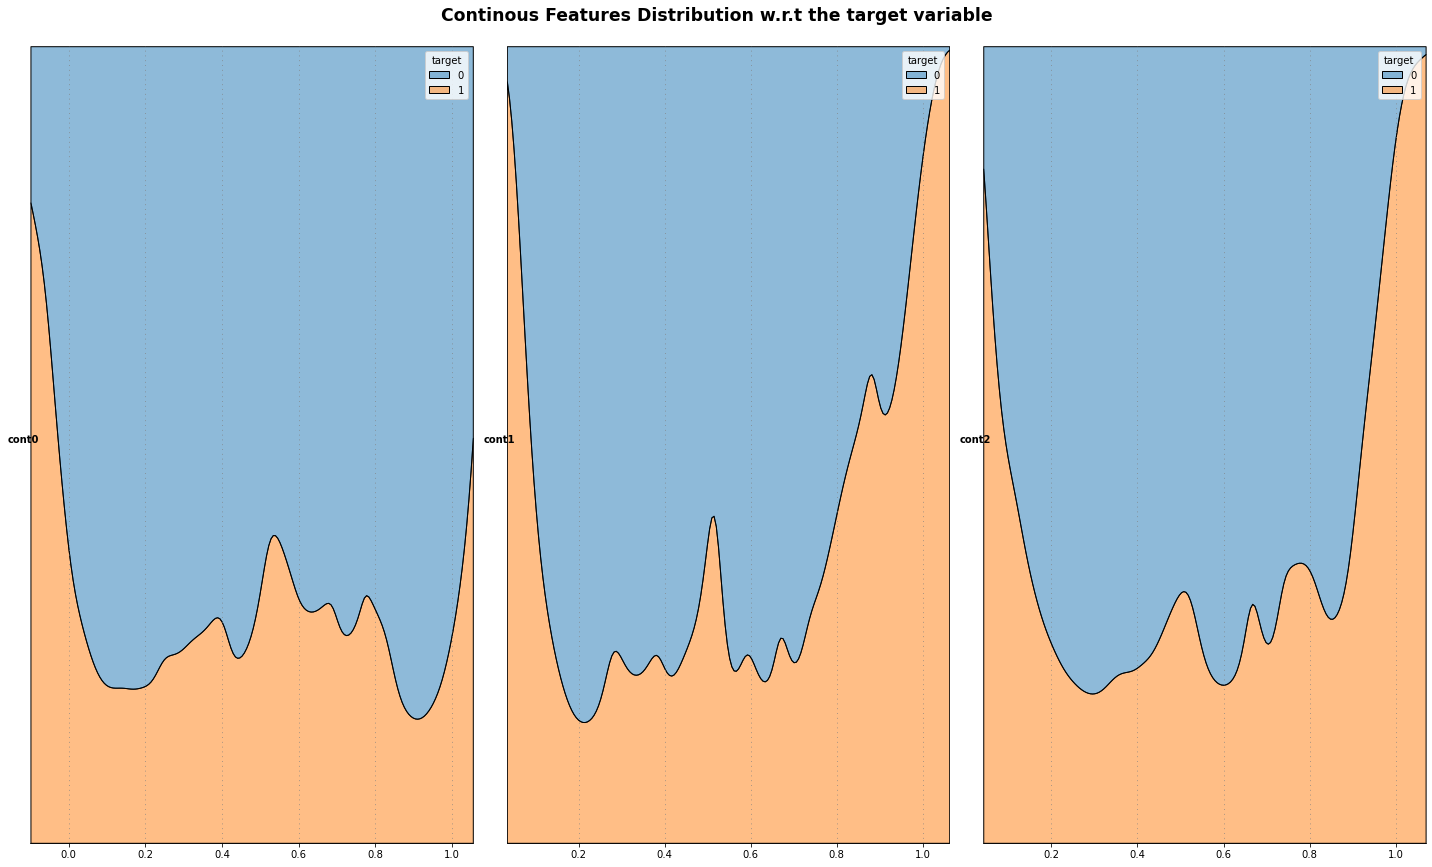

In [5]:
fig=plt.figure(figsize=(20,12),facecolor='white')

fig.suptitle('Continous Features Distribution w.r.t the target variable',x=0.5,y=1, fontsize="xx-large",fontweight="bold")

for plot in range(1,4):
    
    locals()["ax"+str(plot)]=fig.add_subplot(1,3,plot)
    locals()["ax"+str(plot)].set_facecolor('white')
    locals()["ax"+str(plot)].set_yticklabels([])
    locals()["ax"+str(plot)].tick_params(axis='y',which='both',length=0)
    
    for direction in ["top","right", 'left']:
        locals()["ax"+str(plot)].spines[direction].set_visible(False)
    
i=1   
for cont in ['cont0','cont1','cont2']:
    
    sns.kdeplot(tabular[cont],ax=locals()["ax"+str(i)],shade=True, color='olive', alpha=0.5, multiple="fill",hue='target',data=tabular)
    locals()["ax"+str(i)].grid(which='both', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    locals()["ax"+str(i)].set_ylabel(cont, fontsize=10, fontweight='bold').set_rotation(0)
    locals()["ax"+str(i)].set_xlabel('')
    i+=1
    
plt.tight_layout()
plt.show()

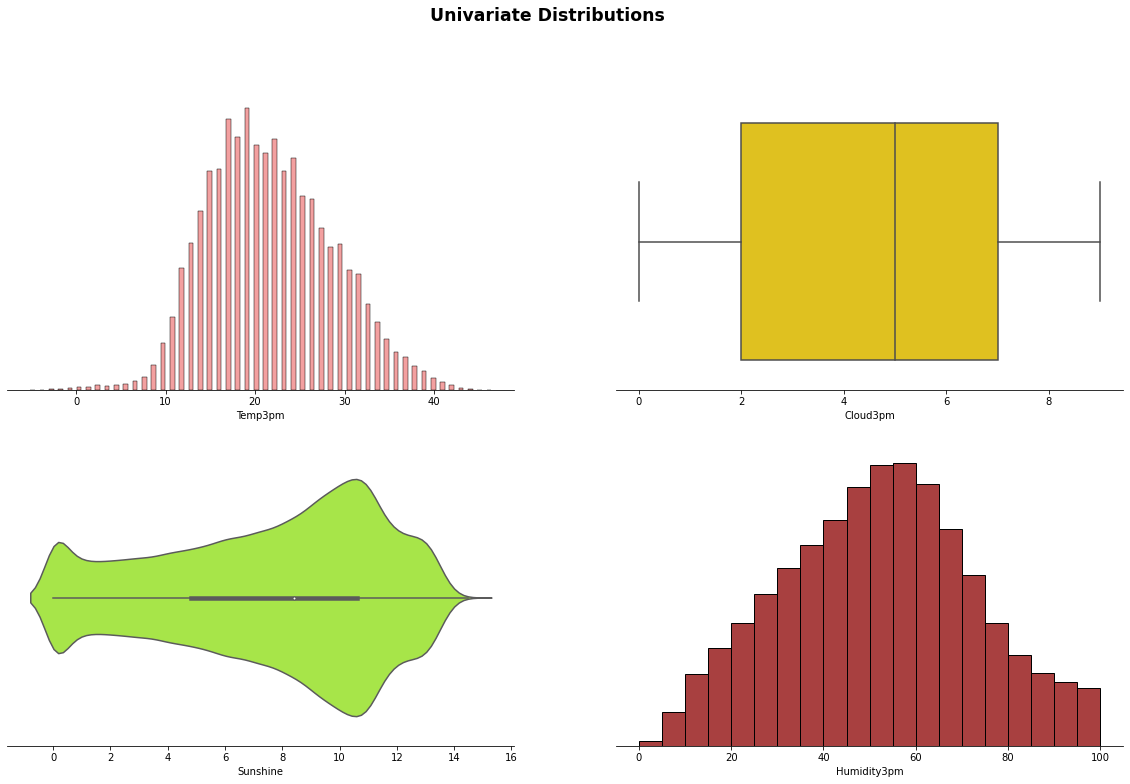

In [6]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Univariate Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="Temp3pm",data=rain,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="Humidity3pm",data=rain,ax=ax[3],bins=20,color='darkred')
sns.boxplot(x='Cloud3pm',data=rain,ax=ax[1],color='gold')
sns.violinplot(x="Sunshine",data=rain,ax=ax[2],color="greenyellow")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

<a id="2.2"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Relationship between two continuous variables</h3>

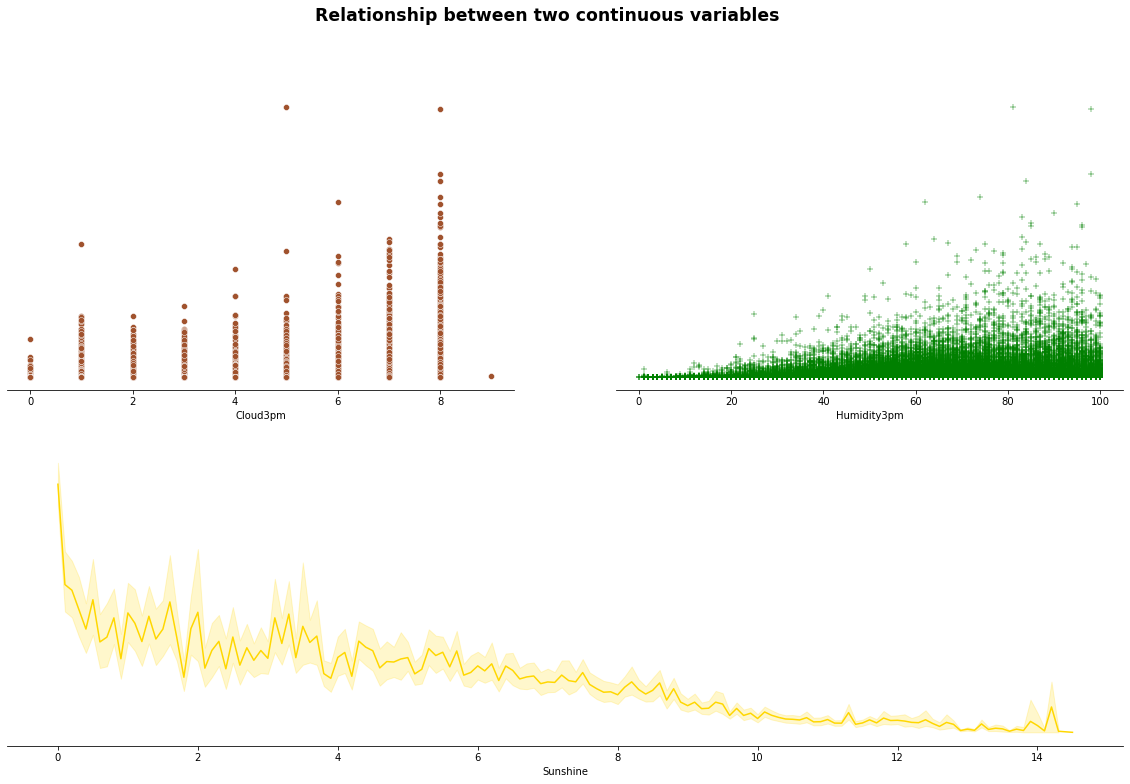

In [7]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Relationship between two continuous variables',fontsize='xx-large',weight='bold')

gs=fig.add_gridspec(2,2)

ax = [None for _ in range(3)]


ax[0]=fig.add_subplot(gs[1,:])
ax[1]=fig.add_subplot(gs[0,0])
ax[2]=fig.add_subplot(gs[0,1])

sns.lineplot(data=rain,x="Sunshine",y="Rainfall",color='gold',ax=ax[0])
sns.scatterplot(data=rain,x="Cloud3pm",y='Rainfall',color='sienna',ax=ax[1])
sns.scatterplot(data=rain,x="Humidity3pm",y="Rainfall",color='green',marker="+",ax=ax[2])

for i in range(3):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

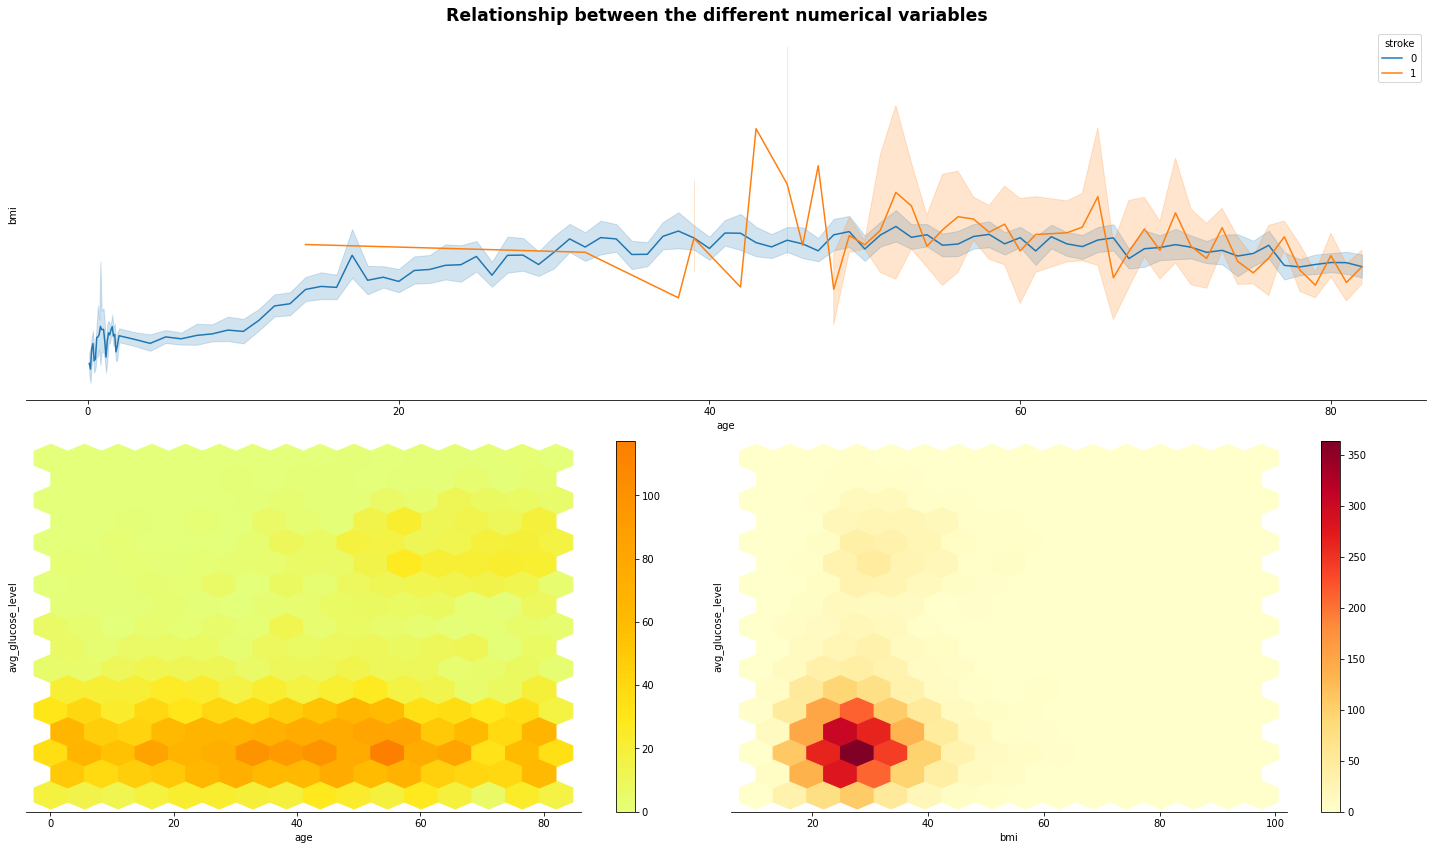

In [8]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Relationship between the different numerical variables',fontsize="xx-large",fontweight="bold")

ax=[None for _ in range(5)]

gs=fig.add_gridspec(2,2)

ax[0]=fig.add_subplot(gs[0,:])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[1,1])

sns.lineplot('age','bmi',data=df,hue='stroke',ax=ax[0])
df.plot.hexbin(x='age', y='avg_glucose_level', gridsize=15,ax=ax[1],colormap='Wistia')
df.plot.hexbin(x='bmi', y='avg_glucose_level', gridsize=15,ax=ax[2],colormap='YlOrRd')


for i in range(3):
    ax[i].set_facecolor('white')
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<a id="2.3"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Relationship between continuous variables and one categorical variable<h3>

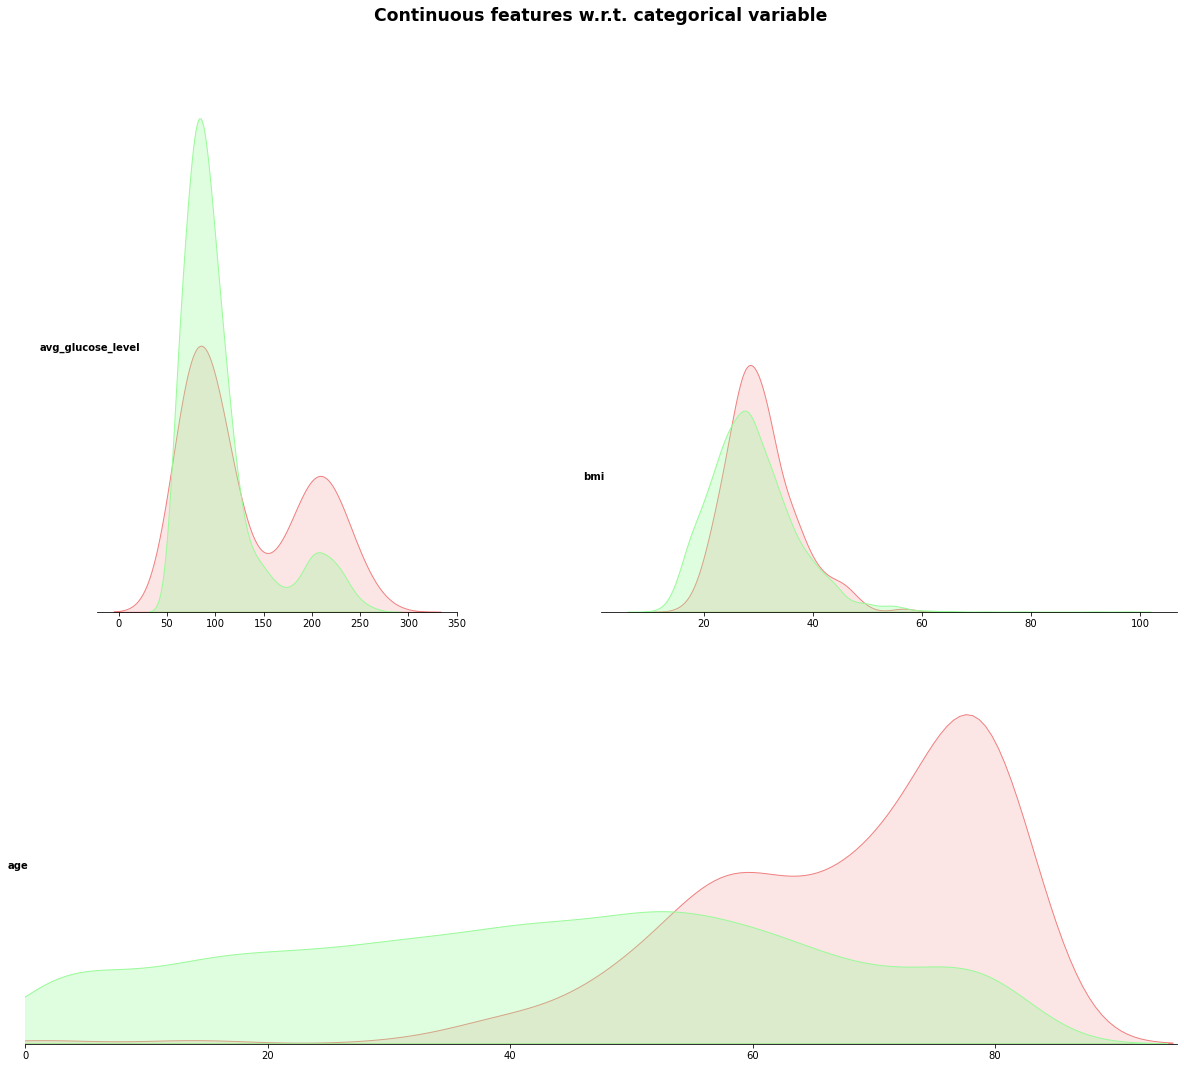

In [9]:
fig=plt.figure(figsize=(20,12),facecolor='white')

ax = [None for _ in range(3)]

plt.suptitle('Continuous features w.r.t. categorical variable',x=0.5,y=1.3, fontsize="xx-large",fontweight="bold")

ax[0] = fig.add_axes([0.1,0.1,0.8,0.4])
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for i in range(3):
    ax[i].set_facecolor('white')
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

i=0
for cont in cont_features:
    
    sns.kdeplot(df[df.stroke==1][cont],ax=ax[i],shade=True, alpha=0.2,color='lightcoral')
    sns.kdeplot(df[df.stroke==0][cont],ax=ax[i],shade=True, alpha=0.3,color='palegreen')
    ax[i].set_ylabel(cont,fontsize=10, fontweight='bold').set_rotation(0)
    ax[i].set_xlabel('')
    
    if i==0:
        ax[i].set_xlim(0,95)
        
    i+=1

<AxesSubplot:xlabel='Age', ylabel='Count'>

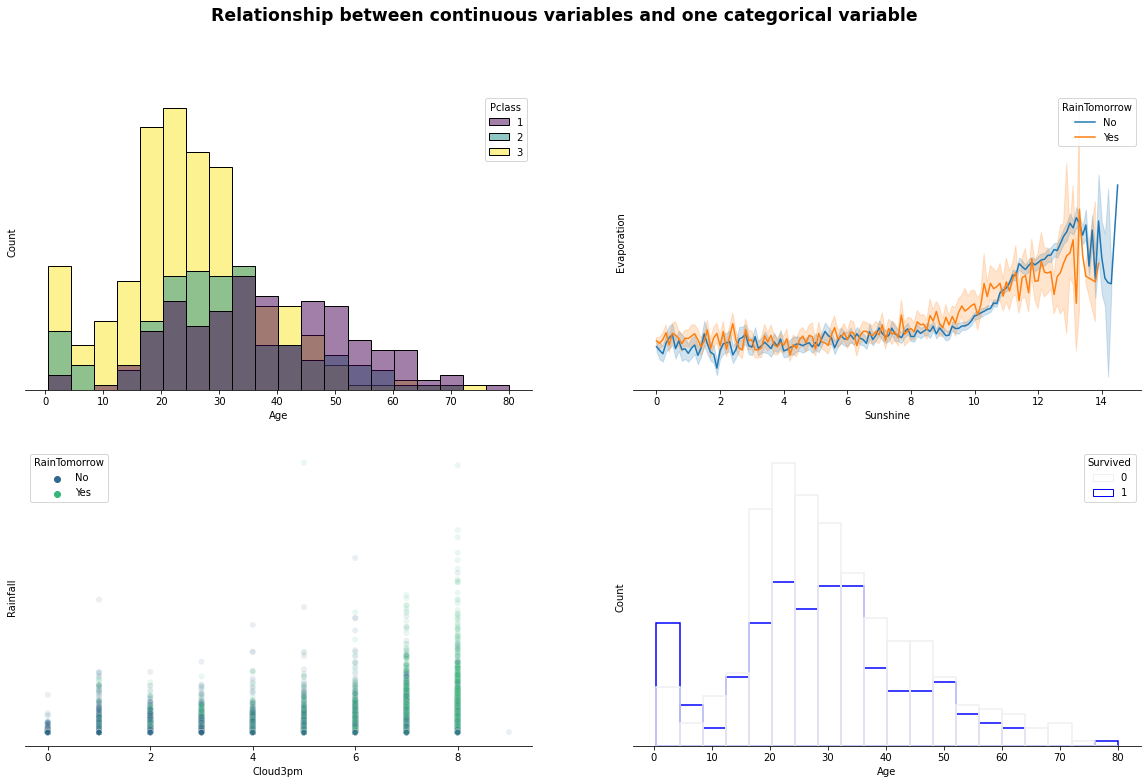

In [10]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Relationship between continuous variables and one categorical variable',fontsize="xx-large",fontweight="bold")


ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])

for i in range(4):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
    
sns.histplot(data=titanic,x='Age',hue='Pclass',ax=ax[0],palette='viridis')
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',ax=ax[1],hue='RainTomorrow')
sns.scatterplot(data=rain,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[2],palette='viridis',markers='o',alpha=0.1)

sns.histplot(data=titanic,x='Age',hue='Survived',ax=ax[3],fill=False,palette='light:b')


<a id="2.4"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Explore categorical variables</h3>

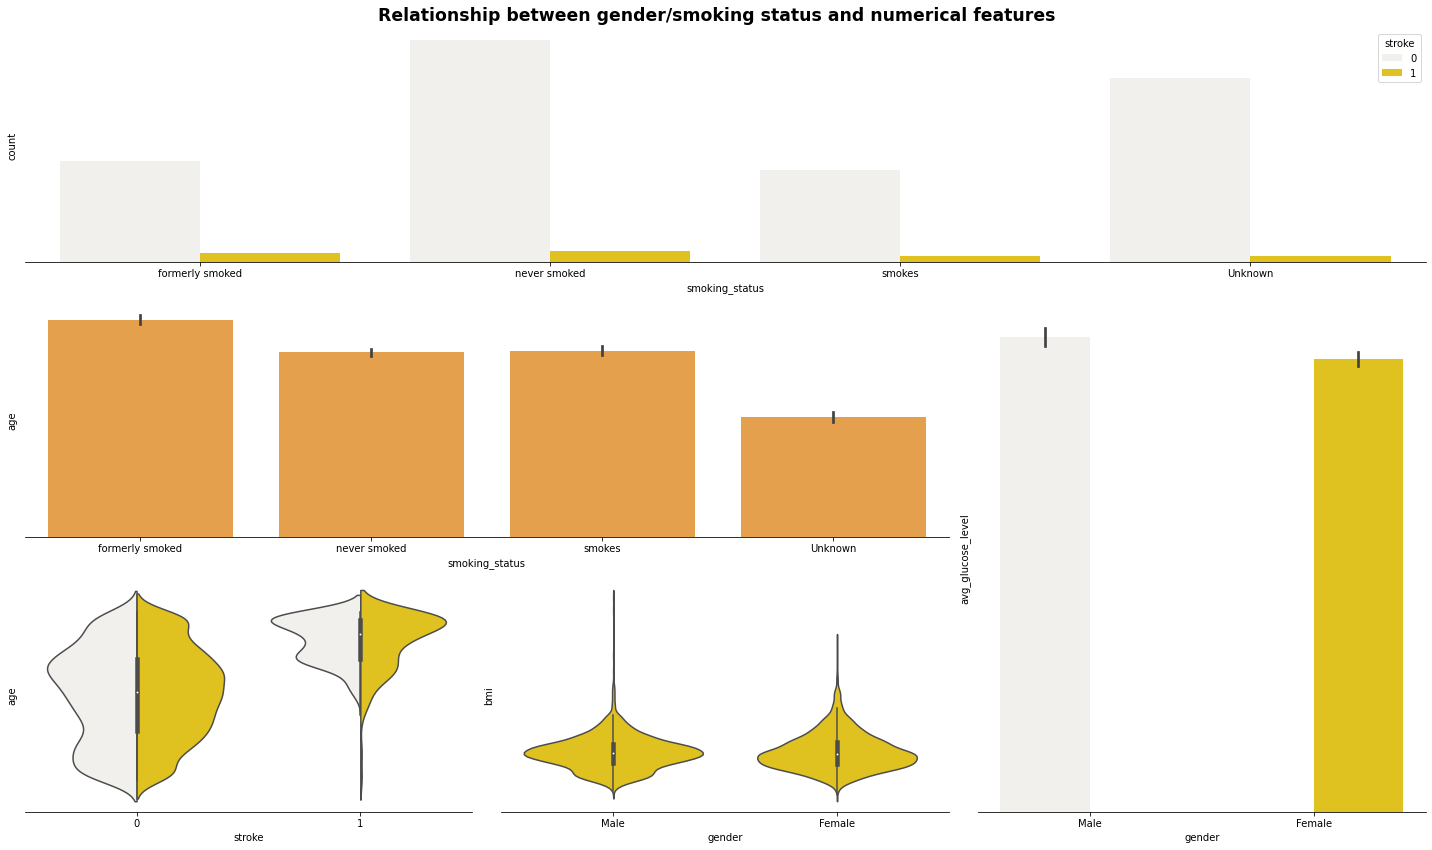

In [11]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Relationship between gender/smoking status and numerical features',fontsize="xx-large",fontweight="bold")

ax=[None for _ in range(5)]

gs=fig.add_gridspec(3,3)

ax[0]=fig.add_subplot(gs[0,:])
ax[1]=fig.add_subplot(gs[1,:-1])
ax[2]=fig.add_subplot(gs[1:3,2])
ax[3]=fig.add_subplot(gs[2,0])
ax[4]=fig.add_subplot(gs[2,1])

sns.violinplot('gender','bmi',ax=ax[4],color='gold',data=df[(df.gender=='Male')|(df.gender=='Female')])
sns.violinplot('stroke','age',ax=ax[3],color='gold',hue='gender',data=df[(df.gender=='Male')|(df.gender=='Female')],split=True)
sns.barplot('gender','avg_glucose_level',ax=ax[2],color='gold',hue='gender',data=df[(df.gender=='Male')|(df.gender=='Female')])

sns.countplot('smoking_status',hue='stroke',data=df,ax=ax[0],color='gold')
sns.barplot('smoking_status','age',data=df,ax=ax[1],color='darkorange',alpha=0.8)

ax[3].get_legend().remove()
ax[2].get_legend().remove()

for i in range(5):
    ax[i].set_facecolor('white')
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()

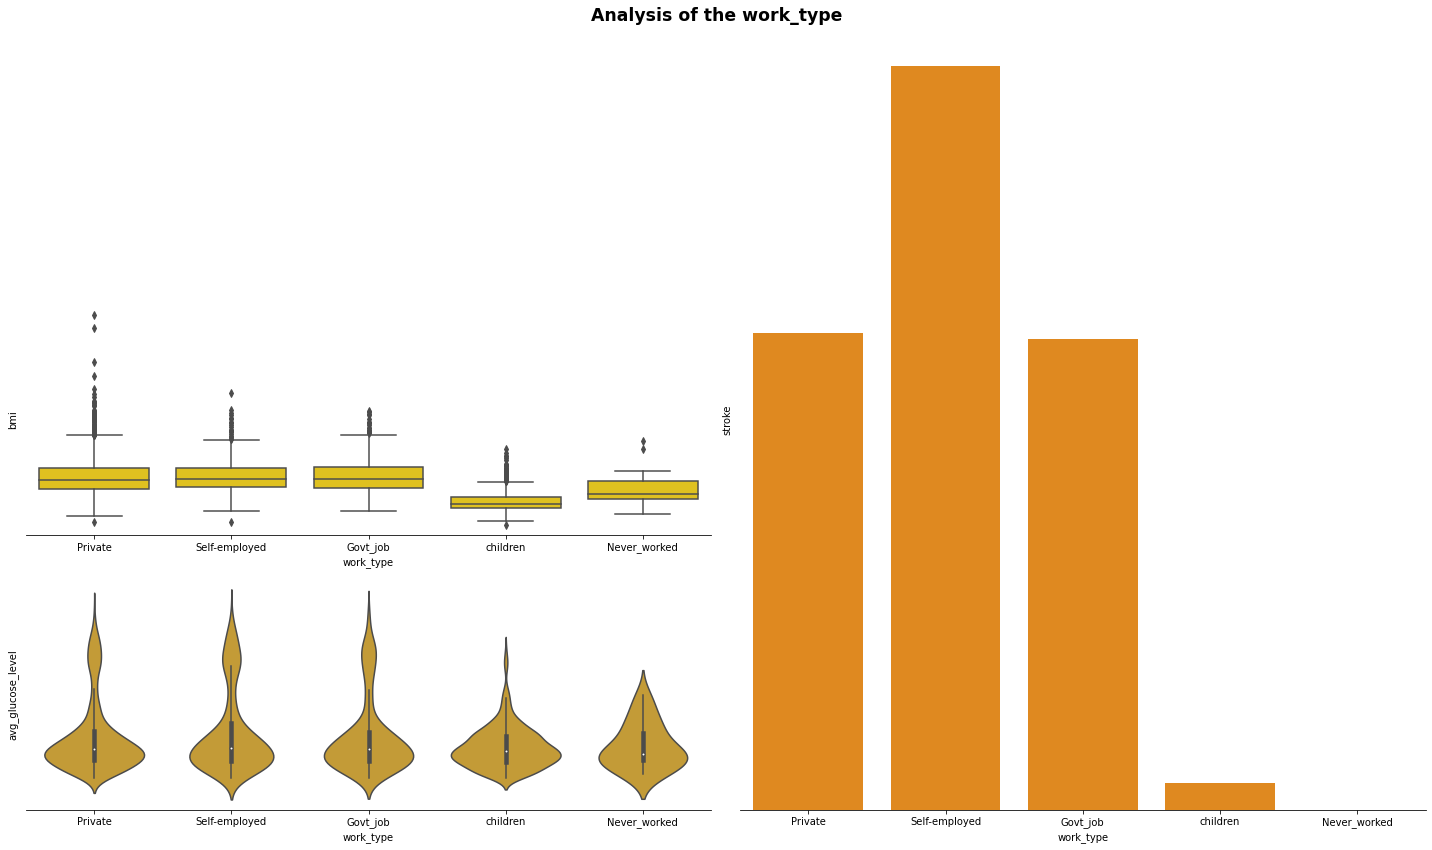

In [12]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Analysis of the work_type',fontsize="xx-large",fontweight="bold")

ax=[None for _ in range(5)]

gs=fig.add_gridspec(3,2)

ax[0]=fig.add_subplot(gs[:,1])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,:-1])

sns.barplot('work_type','stroke',data=df,ax=ax[0],color='darkorange',ci=None)
sns.boxplot('work_type','bmi',data=df,ax=ax[1],color='gold')
sns.violinplot('work_type','avg_glucose_level',data=df,ax=ax[2],color='goldenrod')


for i in range(3):
    ax[i].set_facecolor('white')
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()


<a id="3"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">3D plots</h3>

In [13]:
fig = px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
              color='Species')
fig.show()

**Thank you for reading ! More to come tomorrow, with plotly. If you liked the notebook upvote please!**